In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_blobs
from imblearn.over_sampling import RandomOverSampler

In [2]:
# Creating a well-separated dataset
blobs_random_seed=42
centers=[(0, 0), ((5, 5))]
clusters_std=1.5
frac_test_split=0.33
num_features_for_samples=2
num_samples_total=1600

X, y = make_blobs(
    n_samples=num_samples_total,
    centers=centers,
    n_features=num_features_for_samples,
    cluster_std=clusters_std)

X = pd.DataFrame(X, columns=["varA", "varB"])
y = pd.Series(y)

# make_blobs creates balanced dataset, we'll imbalance it
X = pd.concat([
    X[y == 0],
    X[y == 1].sample(200, random_state=42)
], axis=0)

y = y.loc[X.index]

In [3]:
X.shape, y.shape

((1000, 2), (1000,))

In [4]:
X.head()

,varA,varB
2,1.656111,1.249568
3,1.674354,-0.562339
5,-0.881480,0.742446
6,-1.483993,1.687950
9,1.735800,1.031975


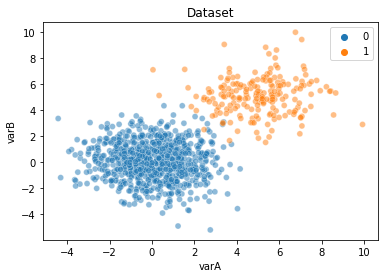

In [5]:
sns.scatterplot(data=X, x="varA", y="varB", hue=y, alpha=0.5)
plt.title("Dataset")
plt.show()

In [6]:
# Random oversampling
ros = RandomOverSampler(
    sampling_strategy="auto",
    random_state=42
)

X_res, y_res = ros.fit_resample(X, y)

In [7]:
X.shape, y.shape

((1000, 2), (1000,))

In [8]:
y.value_counts()

0    800
1    200
dtype: int64

In [9]:
X_res.shape, y_res.shape, y_res.value_counts()

((1600, 2),
 (1600,),
 0    800
 1    800
 dtype: int64)

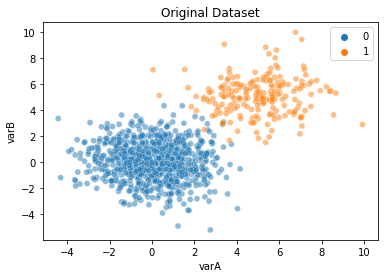

In [10]:
sns.scatterplot(data=X, x="varA", y="varB", hue=y, alpha=0.5)
plt.title("Original Dataset")
plt.show()

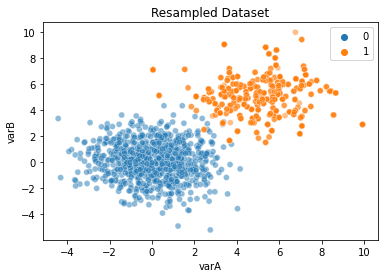

In [11]:
sns.scatterplot(data=X_res, x="varA", y="varB", hue=y_res, alpha=0.5)
plt.title("Resampled Dataset")
plt.show()